# Which features influence a better mathematics score? 
## Analyse of the Pisa 2012 Dataset

## Investigation Overview
In this investigation, I wanted to find features that are related to a better mathematics score. The main focus was on 11 randomly selected variables:

- gender 
- immigration status
- attributions to failure in mathematics
- mathematics anxiety
- subjective norms in mathematics
- instrumental motivation for mathematics
- mathematics interest
- home educational resources
- out of school lessons in mathematics
- Students’ responses regarding parental education
- How many books at home 


## Dataset Overview
The dataset contains 636 columns and 485490 row entries. Each row represents a student performance entry. The student performances are splitted into 3 main categories: Mathematics (PV1MATH to PV5MATH), Reading (PV1READ to PV5READ) and Science (PV1SCIE to PV5SCIE).  
Besides the performance variables, the dataset consists of various other variables such as living country, parent qualifications, possessions, subjective norms, experiences and many more.  
All nan values have been excluded from the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
pisa_full = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
# Reduce the orginal dataset to the choosen columns
pisa = pisa_full.loc[:, ['PV1MATH',
                 'ANXMAT', 'ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10', 
                 'HEDRES', 'ST26Q01', 'ST26Q03', 'ST26Q04', 'ST26Q05', 
                 'MISCED', 'FISCED', 'ST28Q01']]

In [4]:
# convert 'MISCED', 'FISCED', 'ST28Q01', 'ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10' into ordered categorical types
ordinal_var_dict = {'MISCED': ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6'],
                    'FISCED': ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6'],
                    'ST28Q01': ['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books'], 
                    'ST42Q01': ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], 
                    'ST42Q03': ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], 
                    'ST42Q05': ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], 
                    'ST42Q08': ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'],
                    'ST42Q10': ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

In [5]:
# convert 'PV1MATH', 'ANXMAT' into float data types
def change_to_float(col):
    pisa[col] = pisa[col].astype(float)

change_to_float('PV1MATH')
change_to_float('ANXMAT')

## Distribution of Mathematics Scores
Mathematics scores are normaly distributed.

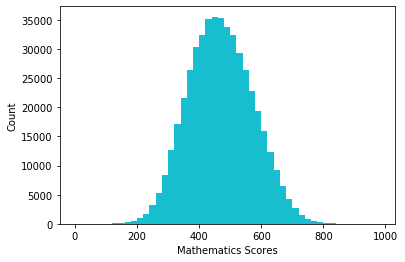

In [6]:
base_color = sb.color_palette()[9]
binsize = 20
bins = np.arange(0, pisa['PV1MATH'].max()+binsize, binsize)
plt.hist(data = pisa, x = 'PV1MATH', bins = bins, color=base_color)
plt.xlabel('Mathematics Scores')
plt.ylabel('Count');

## Mathematics scores versus Mathematics Anxiety
It turned out that of the 11 features, only a few have a relationship to mathematics scores. The first one is mathematics anxiety: the higher the mathematics anxiety, the lower the mathematics scores.

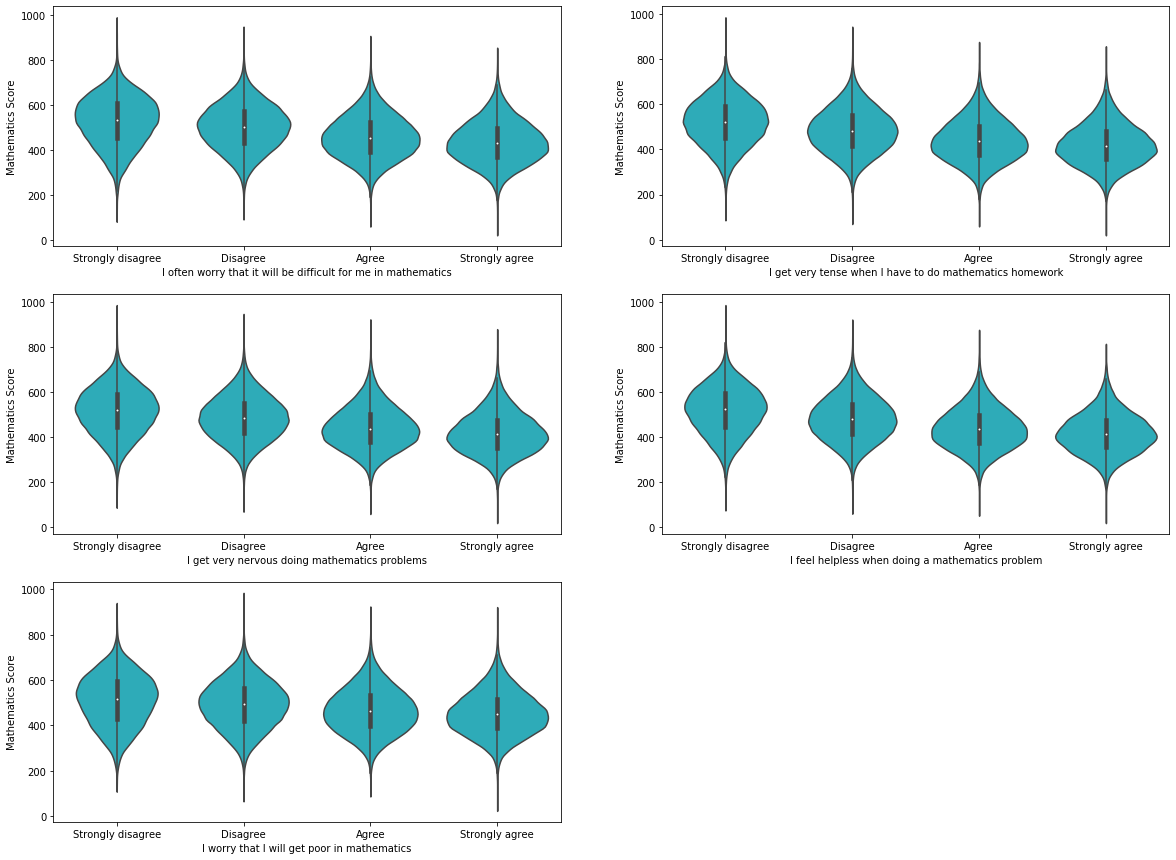

In [7]:
# Comparison of all mathematics anxiety variables to mathematics score
plt.figure(figsize=[20, 15])
plt.subplot(3,2,1)
sb.violinplot(data=pisa, x='ST42Q01', y='PV1MATH', color=base_color)#I often worry that it will be difficult for me in mathematics classes
plt.xlabel('I often worry that it will be difficult for me in mathematics')
plt.ylabel('Mathematics Score')
plt.subplot(3,2,2)
sb.violinplot(data=pisa, x='ST42Q03', y='PV1MATH', color=base_color) #I get very tense when I have to do mathematics homework
plt.xlabel('I get very tense when I have to do mathematics homework')
plt.ylabel('Mathematics Score')
plt.subplot(3,2,3)
sb.violinplot(data=pisa, x='ST42Q05', y='PV1MATH', color=base_color) #I get very nervous doing mathematics problems
plt.xlabel('I get very nervous doing mathematics problems')
plt.ylabel('Mathematics Score')
plt.subplot(3,2,4)
sb.violinplot(data=pisa, x='ST42Q08', y='PV1MATH', color=base_color) #I feel helpless when doing a mathematics problem
plt.xlabel('I feel helpless when doing a mathematics problem')
plt.ylabel('Mathematics Score')
plt.subplot(3,2,5)
sb.violinplot(data=pisa, x='ST42Q10', y='PV1MATH', color=base_color) # I worry that I will get poor in mathematics
plt.xlabel('I worry that I will get poor in mathematics')
plt.ylabel('Mathematics Score'); 

## Mathematics scores versus Parent's Level of Education
The second interesting variable is the students’ responses regarding parental education: the higher the parent's level of education (whether mother or father), the higher the mathematics scores in average.

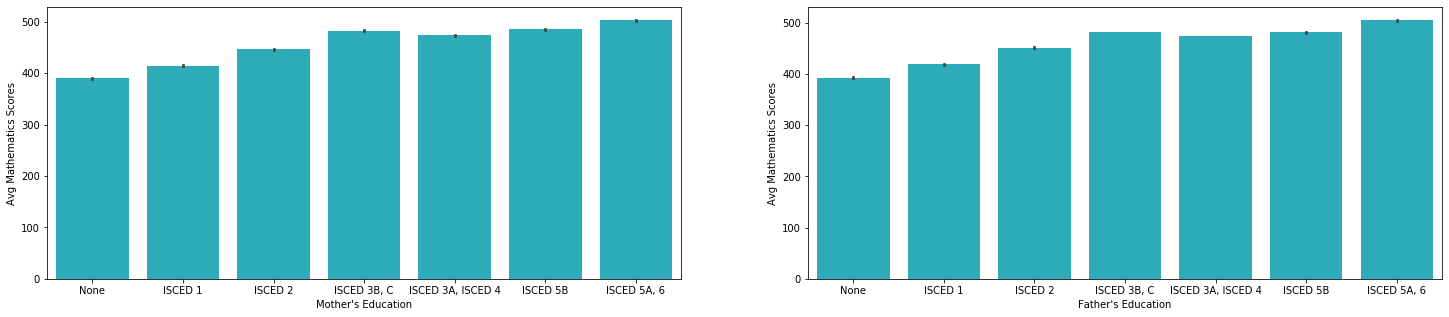

In [8]:
#Students’ responses regarding parental education ('MISCED' & 'FISCED') versus average mathematics score
plt.figure(figsize=[25, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=pisa, x='MISCED', y='PV1MATH', color=base_color)
plt.xlabel('Mother\'s Education')
plt.ylabel('Avg Mathematics Scores')
plt.subplot(1, 2, 2)
sb.barplot(data=pisa, x='FISCED', y='PV1MATH', color=base_color)
plt.xlabel('Father\'s Education')
plt.ylabel('Avg Mathematics Scores');

## Mathematics scores versus Number of Books at Home
The third interesting variable is the number of books a student have at home. This variable is correlated to the mathematics scores: the more books at home available, the higher the mean of mathematics scores.

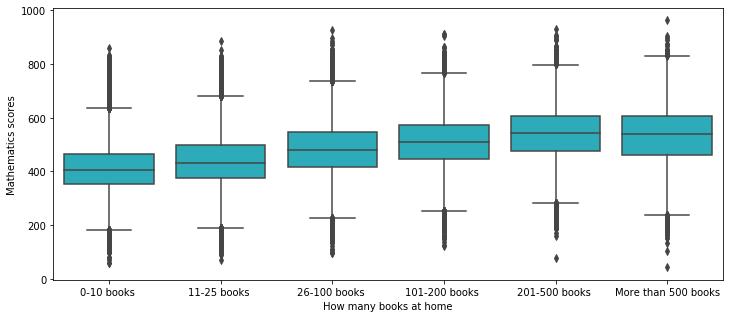

In [9]:
plt.figure(figsize=[12, 5])
sb.boxplot(data=pisa, x='ST28Q01', y='PV1MATH', color=base_color)
plt.xlabel('How many books at home')
plt.ylabel('Mathematics scores');

## Mathematics Anxiety versus Parent's Level of Education versus Number of Books at Home
At a low level of education, we can see that the average mathematics anxiety is the highest, with error bars increasing the higher the group representing the number of books at home.
The mathematics anxiety is at lowest in the highest education level  ISCED 5A, 6. We can also clearly see here, even at this highest educational level, if the number of books at home decreases, the average level of anxiety increases.  
However, this effect isn't so strong at a low level of education.

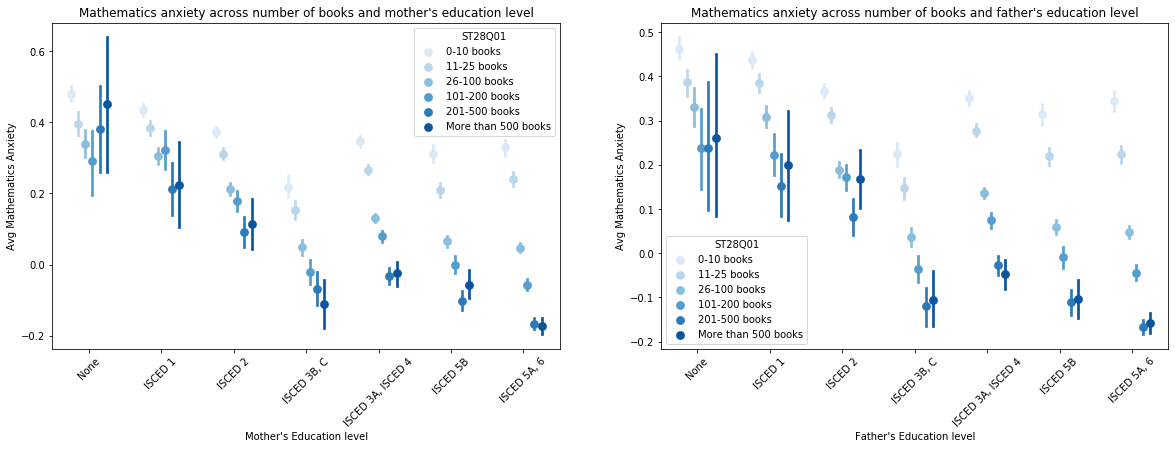

In [10]:
# pointplot comparing math anxiety, parent's education level and number of books
fig, ax = plt.subplots(ncols = 2, figsize = [20,6])
sb.pointplot(data = pisa, x = 'MISCED', y = 'ANXMAT', hue = 'ST28Q01',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('Mathematics anxiety across number of books and mother\'s education level')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_ylabel('Avg Mathematics Anxiety')
ax[0].set_xlabel('Mother\'s Education level')

sb.pointplot(data = pisa, x = 'FISCED', y = 'ANXMAT', hue = 'ST28Q01',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[1])
ax[1].set_title('Mathematics anxiety across number of books and father\'s education level')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel('Avg Mathematics Anxiety')
ax[1].set_xlabel('Father\'s Education level')

plt.show();

## Mathematics Score versus Parent's Level of Education versus Number of Books at Home
Here there is a clear upward trend: the parents with the highest number of books in the household belong to the highest education level group ISCED 5A, 6. Additionaly, this is the group in which students achiece the highest mathematics scores in average.  
However, it's interesting to note that these trends do not apply to the lowest educational levels of parents: if the parents have no education or level ISCED 1, a high number of books at home does not always have a positive relationship with the average mathematics results.


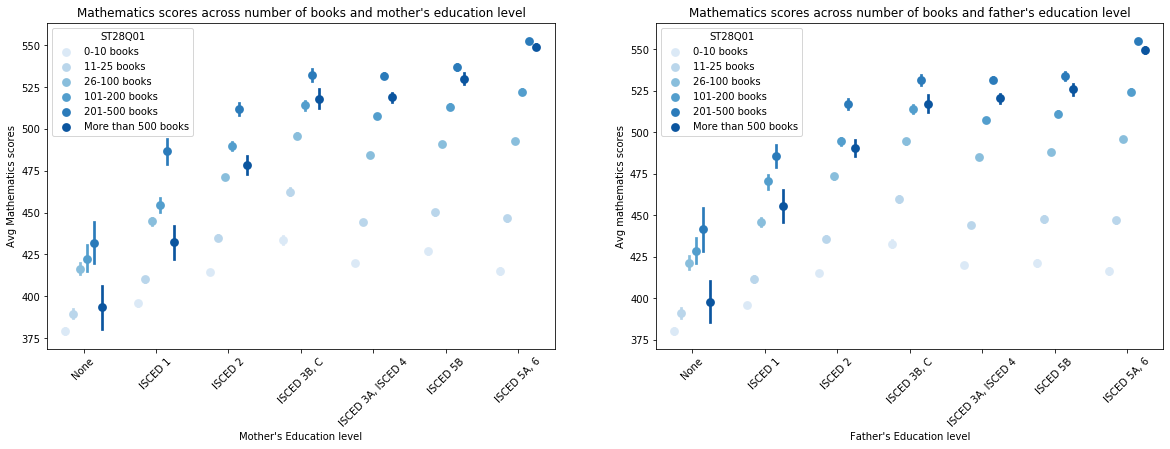

In [11]:
# pointplot comparing math scores, parent's education level and number of books
fig, ax = plt.subplots(ncols = 2, figsize = [20, 6])
sb.pointplot(data = pisa, x = 'MISCED', y = 'PV1MATH', hue = 'ST28Q01',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('Mathematics scores across number of books and mother\'s education level')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_ylabel('Avg Mathematics scores')
ax[0].set_xlabel('Mother\'s Education level')

sb.pointplot(data = pisa, x = 'FISCED', y = 'PV1MATH', hue = 'ST28Q01',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[1])
ax[1].set_title('Mathematics scores across number of books and father\'s education level')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel('Avg mathematics scores')
ax[1].set_xlabel('Father\'s Education level')

plt.show();

## Conclusion
We have seen that the mathematics anxiety is lower when the parents have a higher educational level. These parents seem to provide more educational resources and to own more books at home. These combinations seem to have an impact on both the mathematicsscores and the mathematics anxiety. Interestingly, we found out that even if the parents have a high level of education, if the number of books at home decreases, the mathemtics anxiety increases. On the other hand, if the parents have a low level of education, a high number of books does not relate to a lower level of anxiety or a better mathematics score.  
So it seems that only both features number of books at home and high level of education combined could lead to better mathematics scores.